In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../resources/TX_data_for_Chen_EI.csv")

In [3]:
df.head()

,CNTY_x,CNTYVTD,VAP,BVAP,HVAP,CVAP_2012,BCVAP_2012,HCVAP_2012,Obama,Romney
0,1,10001,2341.0,368.0,217.0,1858,281,41,261,754
1,1,10002,2732.0,188.0,135.0,2995,237,199,228,1179
2,1,10003,1345.0,92.0,96.0,1225,54,34,108,650
3,1,10004,1684.0,52.0,47.0,1789,90,11,128,729
4,1,10005,366.0,3.0,12.0,356,0,4,13,174


a problem precinct (PPs) occurs when `CVAP (VAP) < totvotes`

In [4]:
vap_pps = df[df["VAP"] < (df["Obama"] + df["Romney"])]
vap_pps_nonzero = vap_pps[vap_pps["VAP"] > 0]
vap_pps_big = vap_pps[vap_pps["VAP"] > 1000]
cvap_pps = df[df["CVAP_2012"] < (df["Obama"] + df["Romney"])]
cvap_pps_nonzero = cvap_pps[cvap_pps["VAP"] > 0]
cvap_pps_big = cvap_pps[cvap_pps["VAP"] > 1000]
print(f"There are {len(vap_pps)} VAP PPs\n         - {len(vap_pps_nonzero)} of which have VAP > 0")
print(f"There are {len(cvap_pps)} CVAP PPs\n        - {len(cvap_pps_nonzero)} of which have CVAP > 0")

There are 104 VAP PPs
         - 49 of which have VAP > 0
There are 171 CVAP PPs
        - 116 of which have CVAP > 0


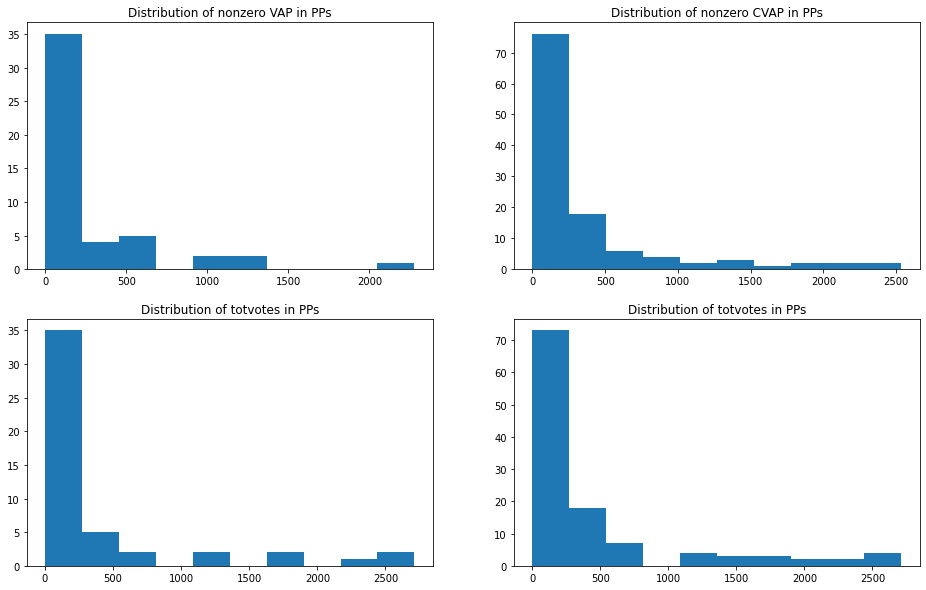

In [5]:
fig, ax = plt.subplots(2,2, figsize=(16,10))

ax[0][0].set_title("Distribution of nonzero VAP in PPs")
ax[0][0].hist(vap_pps_nonzero["VAP"])

ax[0][1].set_title("Distribution of nonzero CVAP in PPs")
ax[0][1].hist(cvap_pps_nonzero["CVAP_2012"])

ax[1][0].set_title("Distribution of totvotes in PPs")
ax[1][0].hist(vap_pps_nonzero["Obama"] + vap_pps_nonzero["Romney"])

ax[1][1].set_title("Distribution of totvotes in PPs")
ax[1][1].hist(cvap_pps_nonzero["Obama"] + cvap_pps_nonzero["Romney"])

plt.show()

In [6]:
vap_pps_big

,CNTY_x,CNTYVTD,VAP,BVAP,HVAP,CVAP_2012,BCVAP_2012,HCVAP_2012,Obama,Romney
366,29,291122A,1013.0,91.0,376.0,1223,193,636,423,717
3423,157,1571007,1283.0,326.0,159.0,1222,188,214,773,1126
8966,491,4910393,2277.0,8.0,34.0,2224,0,144,667,1757
8967,491,4910394,1163.0,0.0,22.0,955,0,23,340,900


In [7]:
cvap_pps_big

,CNTY_x,CNTYVTD,VAP,BVAP,HVAP,CVAP_2012,BCVAP_2012,HCVAP_2012,Obama,Romney
391,29,291143,1016.0,114.0,388.0,361,4,30,245,282
616,29,293055,1746.0,10.0,371.0,1365,0,158,332,1284
728,29,293164,1333.0,60.0,279.0,943,0,241,339,789
1756,85,850207,1516.0,200.0,189.0,1188,110,197,262,953
2210,113,1132222,2382.0,1.0,65.0,2120,0,70,322,1915
2813,121,1211036,2186.0,85.0,378.0,1772,85,107,576,1425
2842,121,1212012,1131.0,59.0,54.0,985,118,81,254,870
3423,157,1571007,1283.0,326.0,159.0,1222,188,214,773,1126
3507,157,1573149,2668.0,120.0,197.0,2497,142,154,465,2177
4937,201,2010955,1879.0,35.0,452.0,1802,23,283,366,1508


In [2]:
VTDtoHD = pd.read_csv("../resources/TX_district_assignment.csv")

In [15]:
def easy_calculateMODs(run):
    df = pd.read_csv(f"../final_testing/{run}.csv")
    df = pd.merge(df, VTDtoHD, how='inner')
    df = df.groupby(by="sldl358").sum()
    
    BDvotes = "BDvotes"
    HDvotes = "HDvotes"
    BRvotes = "BRvotes"
    HRvotes = "HRvotes"
    ODvotes = "ODvotes"
    ORvotes = "ORvotes"
    
    obamaWins = (df[BDvotes] + df[HDvotes] + df[ODvotes]) > (df[BRvotes] + df[HRvotes] + df[ORvotes])
    romneyWins = ~obamaWins
    
    BHD_Outnumber_OD = 1*(df[BDvotes] + df[HDvotes]) > df[ODvotes]
    BR_Outnumber_OR = df[BRvotes] > df[ORvotes]
    BD_Outnumber_OD = df[BDvotes] > df[ODvotes]
    HD_Outnumber_OD = df[HDvotes] > df[ODvotes]
    HR_Outnumber_OR = df[HRvotes] > df[ORvotes]
    BHR_Outnumber_OR = (df[BRvotes] + df[HRvotes]) > df[ORvotes]
    
    BHD = (df[BDvotes] > df[BRvotes]) & (df[HDvotes] > df[HRvotes])
    BR_HD = (df[BDvotes] <= df[BRvotes]) & (df[HDvotes] > df[HRvotes])
    BD_HR = (df[BDvotes] > df[BRvotes]) & (df[HDvotes] <= df[HRvotes])
    BHR = (df[BDvotes] <= df[BRvotes]) & (df[HDvotes] <= df[HRvotes])
    
    case1 = BHD & obamaWins & BHD_Outnumber_OD
    case2 = BR_HD & ((obamaWins & HD_Outnumber_OD) | (romneyWins & BR_Outnumber_OR))
    case3 = BD_HR & ((obamaWins & BD_Outnumber_OD) | (romneyWins & HR_Outnumber_OR))
    case4 = BHR & romneyWins & BHR_Outnumber_OR
    
    OODs = case1 | case2 | case3 | case4
    
#     print(f"Case 1: {sum(case1)}, {np.where(case1)}")
#     print(f"Case 2: {sum(case2)}, {np.where(case2)}")
#     print(f"Case 3: {sum(case3)}, {np.where(case3)}")
#     print(f"Case 4: {sum(case4)}, {np.where(case4)}")
#     print(f"None: {sum(~OODs)}, {np.where(~OODs)}")

    return sum(OODs)

In [11]:
for i in range(1,11):
    print(i, easy_calculateMODs(f"scalePop_PPs_CVAP_one_phase_statewide_{i}"))

1 51
2 51
3 51
4 51
5 51
6 51
7 51
8 51
9 51
10 51


In [16]:
for i in range(1,3):
    print(i, easy_calculateMODs(f"scaleVotes_PPs_VAP_two_phase_statewide_{i}"))

1 33
2 32


In [14]:
for i in range(1,21):
    print(i, easy_calculateMODs(f"scaleVotes_PPs_VAP_two_phase_{i}"))

1 45
2 45
3 44
4 45
5 45
6 44
7 44
8 44
9 45
10 44
11 45
12 44
13 44
14 45
15 45
16 45
17 45
18 44
19 45
20 45


In [12]:
easy_calculateMODs("buffer_PPs_VAP_two_phase_2")

34

In [13]:
easy_calculateMODs("buffer_PPs_VAP_two_phase_13")

37

In [165]:
df = pd.read_csv(f"../final_final_testing/scaleVotes_PPs_VAP_two_phase_1.csv")
df = pd.merge(df, VTDtoHD, how='inner')
df = df.groupby(by="sldl358").sum()
df.iloc[100]

CNTY_x         20633.000000
TOTPOP        110209.000000
BPOP           28459.000000
HPOP           35790.000000
CVAP_2012      87870.000000
BCVAP_2012     25340.000000
HCVAP_2012     19226.000000
Obama          27431.000000
Romney         14942.000000
bvotes         11894.258291
hvotes          2658.337077
ovotes         27696.982195
BRvotes          581.001363
BDvotes        11313.256928
HRvotes          238.089656
HDvotes         2420.247420
ORvotes        14156.966049
ODvotes        13540.016146
Unnamed: 0    363766.000000
CD               687.000000
sldl309         4747.000000
sldu172          738.000000
Name: 101, dtype: float64

In [164]:
df = pd.read_csv(f"../final_final_testing/scaleVotes_PPs_VAP_two_phase_3.csv")
df = pd.merge(df, VTDtoHD, how='inner')
df = df.groupby(by="sldl358").sum()
df.iloc[100]

CNTY_x         20633.000000
TOTPOP        110209.000000
BPOP           28459.000000
HPOP           35790.000000
CVAP_2012      87870.000000
BCVAP_2012     25340.000000
HCVAP_2012     19226.000000
Obama          27431.000000
Romney         14942.000000
bvotes         11828.041595
hvotes          2690.040873
ovotes         27729.300985
BRvotes          650.941336
BDvotes        11177.100259
HRvotes          306.860913
HDvotes         2383.179959
ORvotes        14007.327606
ODvotes        13721.973379
Unnamed: 0    363766.000000
CD               687.000000
sldl309         4747.000000
sldu172          738.000000
Name: 101, dtype: float64

In [166]:
df = pd.read_csv(f"../final_final_testing/scaleVotes_PPs_VAP_two_phase_10.csv")
df = pd.merge(df, VTDtoHD, how='inner')
df = df.groupby(by="sldl358").sum()
df.iloc[148]

CNTY_x          4623.000000
TOTPOP        121535.000000
BPOP           28026.000000
HPOP           41056.000000
CVAP_2012      86325.000000
BCVAP_2012     23592.000000
HCVAP_2012     19313.000000
Obama          24737.000000
Romney         16877.000000
bvotes          9928.128647
hvotes          2687.963250
ovotes         29022.410826
BRvotes          267.752342
BDvotes         9660.376305
HRvotes          266.018967
HDvotes         2421.944283
ORvotes        16385.651998
ODvotes        12636.758828
Unnamed: 0    106108.000000
CD               199.000000
sldl309         3415.000000
sldu172          355.000000
Name: 149, dtype: float64

In [149]:
OODs_list = []
for i in range(1,21):
    OODs_list.append(easy_calculateMODs(f"scaleVotes_PPs_VAP_two_phase_{i}"))
for i, s in enumerate(OODs_list):
    print(i, s)

0 45
1 45
2 45
3 45
4 45
5 45
6 45
7 45
8 45
9 46
10 45
11 45
12 45
13 45
14 45
15 45
16 45
17 45
18 45
19 45


In [93]:
for i in [2,5,6,7,9,11,12,17]:
    print(set(OODs_list[19]).difference(set(OODs_list[2])))

{100}
{100}
{100}
{100}
{100}
{100}
{100}
{100}


In [170]:
a = easy_calculateMODs("scaleVotes_PPs_VAP_two_phase_1")

Case 1: 39, (array([ 21,  26,  30,  33,  36,  37,  39,  41,  73,  74,  76,  77,  78,
        89,  94,  99, 100, 103, 108, 109, 110, 115, 116, 117, 118, 119,
       122, 123, 124, 130, 138, 139, 140, 141, 142, 143, 144, 145, 146]),)
Case 2: 6, (array([34, 35, 38, 40, 75, 79]),)
Case 3: 0, (array([], dtype=int64),)
Case 4: 0, (array([], dtype=int64),)
None: 105, (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  22,  23,  24,  25,  27,
        28,  29,  31,  32,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  90,  91,  92,  93,  95,  96,  97,  98,
       101, 102, 104, 105, 106, 107, 111, 112, 113, 114, 120, 121, 125,
       126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 147, 148,
       149]),)


In [172]:
for i in a:
    print(i+1)

[ 22  27  31  34  35  36  37  38  39  40  41  42  74  75  76  77  78  79
  80  90  95 100 101 104 109 110 111 116 117 118 119 120 123 124 125 131
 139 140 141 142 143 144 145 146 147]


In [159]:
easy_calculateMODs("scaleVotes_PPs_VAP_two_phase_10")

Case 1: 43, (array([ 21,  26,  30,  33,  34,  35,  36,  37,  38,  39,  41,  73,  74,
        76,  77,  78,  89,  94,  99, 100, 103, 108, 109, 110, 115, 116,
       117, 118, 119, 122, 123, 124, 130, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 148]),)
Case 2: 3, (array([40, 75, 79]),)
Case 3: 0, (array([], dtype=int64),)
Case 4: 0, (array([], dtype=int64),)
None: 104, (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  22,  23,  24,  25,  27,
        28,  29,  31,  32,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  90,  91,  92,  93,  95,  96,  97,  98,
       101, 102, 104, 105, 106, 107, 111, 112, 113, 114, 120, 121, 125,
       126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 147, 149]),)


46

In [136]:
easy_calculateMODs("scaleVotes_PPs_VAP_two_phase_3")

Case 1: 42, (array([ 21,  26,  30,  33,  34,  35,  36,  37,  38,  39,  40,  41,  73,
        74,  76,  77,  78,  89,  94,  99, 103, 108, 109, 110, 115, 116,
       117, 118, 119, 122, 123, 124, 130, 138, 139, 140, 141, 142, 143,
       144, 145, 146]),)
Case 2: 2, (array([75, 79]),)
Case 3: 0, (array([], dtype=int64),)
Case 4: 0, (array([], dtype=int64),)
None: 106, (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  22,  23,  24,  25,  27,
        28,  29,  31,  32,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  90,  91,  92,  93,  95,  96,  97,  98,
       100, 101, 102, 104, 105, 106, 107, 111, 112, 113, 114, 120, 121,
       125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 147,
       148, 149]),)


44

In [137]:
for i in range(1,14):
    print(f"buffer_PPs_VAP_two_phase_{i}: ", end="")
    easy_calculateMODs(f"buffer_PPs_VAP_two_phase_{i}")

buffer_PPs_VAP_two_phase_1: 

FileNotFoundError: [Errno 2] No such file or directory: '../final_final_testing/buffer_PPs_VAP_two_phase_1.csv'

In [26]:
run = "scaleVotes_PPs_VAP_two_phase_statewide_1"
df = pd.read_csv(f"../final_testing/{run}.csv")
df = pd.merge(df, VTDtoHD, how='inner')

In [27]:
df = df.groupby(by="HD").sum()

In [28]:
df.iloc[129:131]

,CNTY_x,TOTPOP,BPOP,HPOP,CVAP_2012,BCVAP_2012,HCVAP_2012,Obama,Romney,bvotes,hvotes,ovotes,BRvotes,BDvotes,HRvotes,HDvotes,ORvotes,ODvotes
HD,,,,,,,,,,,,,,,,,,
130,7638,122108,8807,21667,109844,8428,14847,15928,53020,2855.678291,4434.418113,61650.720191,301.268034,3585.412091,744.581258,4926.564887,27983.913489,5116.839072
131,7638,121368,49807,49951,90360,48804,22778,36581,6861,21086.143868,9622.771929,12721.912785,89.048284,4586.918592,643.720846,6015.488291,11640.046509,10054.984383


In [25]:
statewide_MODs

[10,
 35,
 43,
 44,
 45,
 46,
 53,
 54,
 55,
 65,
 66,
 74,
 75,
 78,
 83,
 101,
 104,
 105,
 107,
 110,
 111,
 112,
 113,
 114,
 115,
 130,
 132,
 133,
 138,
 139,
 141,
 143,
 144,
 147]

In [9]:
easy_calculateMODs("buffer_PPs_VAP_two_phase_12")

Case 1: 34
Case 2: 1
Case 3: 0
Case 4: 0


[21,
 26,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 73,
 74,
 75,
 76,
 78,
 79,
 89,
 94,
 99,
 103,
 108,
 109,
 110,
 117,
 119,
 130,
 138,
 139,
 140,
 141,
 142,
 145,
 146]

In [61]:
statewide_MODs

[10,
 35,
 43,
 44,
 45,
 46,
 53,
 54,
 55,
 65,
 66,
 74,
 75,
 78,
 83,
 101,
 104,
 105,
 107,
 110,
 111,
 112,
 113,
 114,
 115,
 132,
 133,
 138,
 139,
 141,
 143,
 144,
 147]

In [62]:
county_MODs = easy_calculateMODs("scaleVotes_PPs_VAP_two_phase_1")

Case 1: 39
Case 2: 6
Case 3: 0
Case 4: 0


In [36]:
for i in range(1,11):
    easy_calculateMODs(f"scalePop_PPs_CVAP_one_phase_statewide_{i}")

51
51
51
51
51
51
51
51
51
51


In [35]:
easy_calculateMODs("scalePop_PPs_CVAP_one_phase_statewide_1")

51


[21,
 26,
 30,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 45,
 50,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 89,
 94,
 99,
 100,
 102,
 103,
 108,
 109,
 110,
 115,
 116,
 117,
 118,
 119,
 122,
 123,
 124,
 130,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148]

In [28]:
easy_calculateMODs("scaleVotes_PPs_VAP_two_phase_2")

Case 1: 40
Case 2: 5
Case 3: 0
Case 4: 0
scaleVotes_PPs_VAP_two_phase_2: 45


In [29]:
easy_calculateMODs("scaleVotes_PPs_VAP_two_phase_1")

Case 1: 39
Case 2: 6
Case 3: 0
Case 4: 0
scaleVotes_PPs_VAP_two_phase_1: 45


In [255]:
easy_calculateMODs("buffer_PPs_VAP_two_phase_1")

buffer_PPs_VAP_two_phase_1: 36


In [256]:
easy_calculateMODs("buffer_PPs_VAP_two_phase_2")

buffer_PPs_VAP_two_phase_2: 34


In [19]:
def compare_runs(run1, run2):
    df1 = pd.read_csv(f"../final_final_testing/{run1}.csv")
    df2 = pd.read_csv(f"../final_final_testing/{run2}.csv")

    fig, ax = plt.subplots(figsize=(12,8))
    plt.title(f"Comparing EI flavors — {run1} vs. {run2}")
    plt.xlabel(f"Rep Share of BVAP vote, {run1}")
    plt.ylabel(f"Rep Share of BVAP vote, {run2}")
#     x = df1["BDvotes"] / df1["bvotes"]
#     y = df2["BDvotes"] / df2["bvotes"]
    x = df1["BDvotes"] / (df1["BDvotes"] + df1["BRvotes"])
    y = df2["BDvotes"] / (df2["BDvotes"] + df2["BRvotes"])
#     x = df1["BRvotes"] / df1["BPOP"]
#     y = df2["BRvotes"] / df2["BPOP"]
    upper = min(max(x), max(y))
    lower = max(min(x), min(y))
    print(lower, upper)
    if upper > 10000:
        upper = 120
        ax.set_xlim(-2,120)
        ax.set_ylim(-2,120)
    ax.scatter(x, y)
    ax.plot([lower,upper], [lower,upper])
    plt.show()

0.12050767273316036 0.9995120929686043


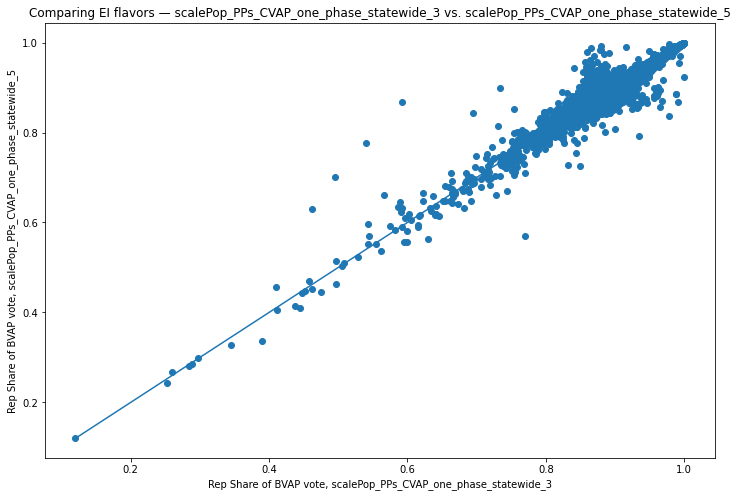

In [31]:
compare_runs("scalePop_PPs_CVAP_one_phase_statewide_3", "scalePop_PPs_CVAP_one_phase_statewide_5")

0.03315796469559282 0.9994361264362196


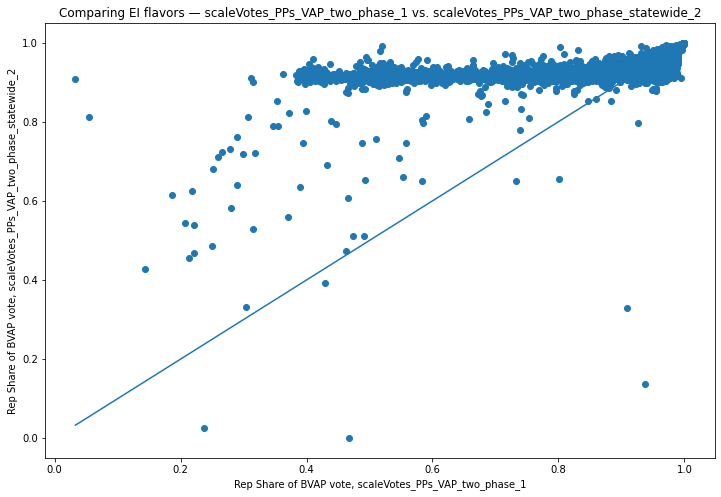

In [27]:
compare_runs("scaleVotes_PPs_VAP_two_phase_1", "scaleVotes_PPs_VAP_two_phase_statewide_2")

## Investigating stability with different EI flavors
**buffer / scaleVotes / scalePop**
 * **buffer**: add a buffer column to account for population/votes discrepancies
 * **scaleVotes**: when (C)VAP < totvotes, scale Obama and Romney down to match...\[explain more\]
 * **scalePop**: when (C)VAP < totvotes, scale \_(C)VAP up to match totvotes

0.00019420805168820203 0.92793708523777


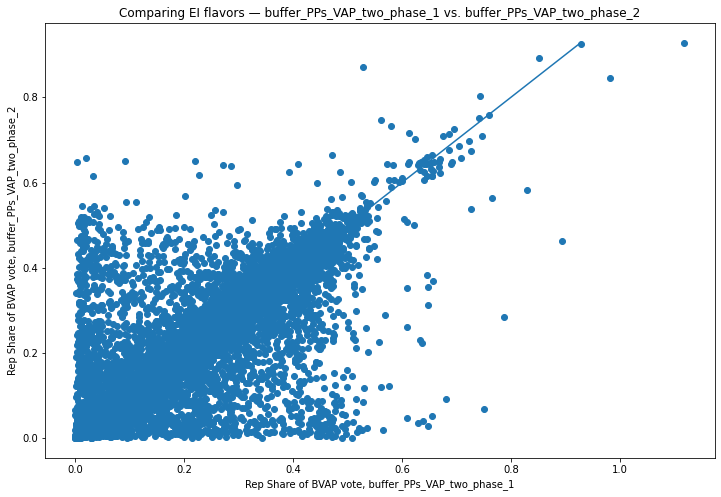

In [232]:
compare_runs("buffer_PPs_VAP_two_phase_1", "buffer_PPs_VAP_two_phase_2")

4.754805181489322e-05 0.49635414089084506


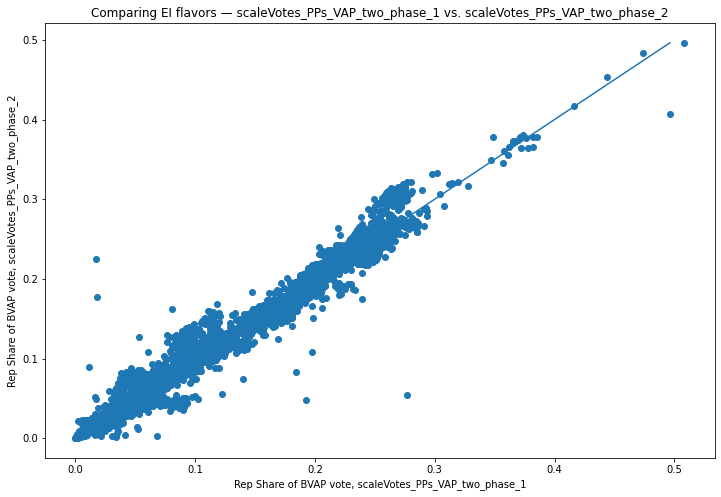

In [246]:
compare_runs("scaleVotes_PPs_VAP_two_phase_1", "scaleVotes_PPs_VAP_two_phase_2")

0.0 inf


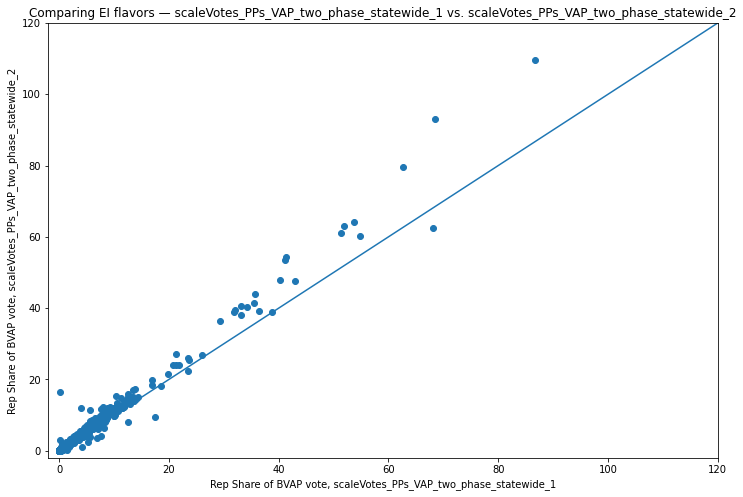

In [249]:
compare_runs("scaleVotes_PPs_VAP_two_phase_statewide_1", "scaleVotes_PPs_VAP_two_phase_statewide_2")

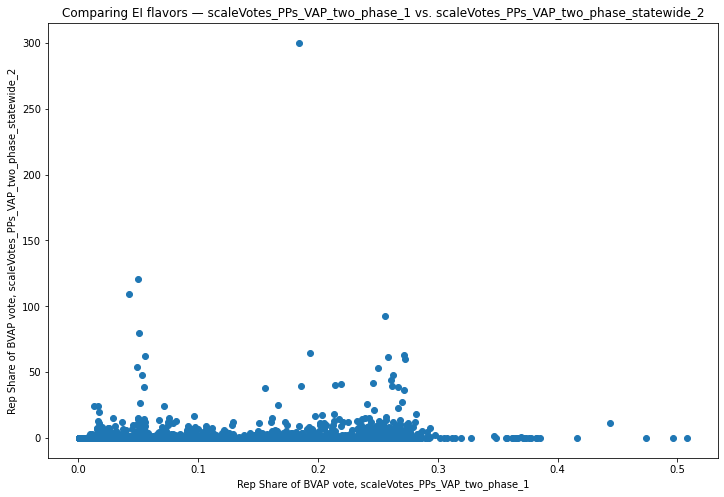

In [200]:
compare_runs("scaleVotes_PPs_VAP_two_phase_1", "scaleVotes_PPs_VAP_two_phase_statewide_2")

In [213]:
df1 = pd.read_csv(f"../final_testing/scaleVotes_PPs_VAP_two_phase_statewide_1.csv")
df2 = pd.read_csv(f"../final_testing/scaleVotes_PPs_VAP_two_phase_statewide_2.csv")

In [214]:
more = list(np.where(df1["BRvotes"] > df1["BPOP"])[0])

In [217]:
df1.iloc[50]

CNTY_x               5
CNTYVTD          50023
TOTPOP             595
BPOP                 2
HPOP                17
CVAP_2012          520
BCVAP_2012          24
HCVAP_2012          24
Obama               51
Romney             260
bvotes        0.679387
hvotes         3.63876
ovotes           306.9
BRvotes        3.73914
BDvotes        40.6108
HRvotes        9.82233
HDvotes        63.5346
ORvotes        1444.81
ODvotes         265.76
Name: 50, dtype: object

In [216]:
len(more)

1417

In [177]:
farAways = list(np.where(abs((df1["BDvotes"] / (df1["BDvotes"] + df1["BRvotes"])) - \
                    (df2["BDvotes"] / (df2["BDvotes"] + df2["BRvotes"]))) > 0.25)[0])

In [178]:
len(farAways)

12

In [134]:
farAways[:5]

[9, 355, 369, 376, 545]

In [138]:
df1.iloc[8:10]

,CNTY_x,CNTYVTD,TOTPOP,BPOP,HPOP,CVAP_2012,BCVAP_2012,HCVAP_2012,Obama,Romney,bvotes,hvotes,ovotes,BRvotes,BDvotes,HRvotes,HDvotes,ORvotes,ODvotes
8,1,10009,1599,132,104,1612,323,79,157,559,28.651907,26.379902,661.298962,9.731873,18.920034,10.531652,15.848250,539.359667,121.939295
9,1,10010,6925,2641,1572,7526,2687,1615,45,278,55.684875,64.800845,205.791734,35.032519,20.652356,47.207217,17.593627,194.972558,10.819176


In [139]:
df2.iloc[8:10]

,CNTY_x,CNTYVTD,TOTPOP,BPOP,HPOP,CVAP_2012,BCVAP_2012,HCVAP_2012,Obama,Romney,bvotes,hvotes,ovotes,BRvotes,BDvotes,HRvotes,HDvotes,ORvotes,ODvotes
8,1,10009,1599,132,104,1612,323,79,157,559,29.543444,27.682443,659.213503,10.342713,19.200731,11.066148,16.616295,538.112938,121.100565
9,1,10010,6925,2641,1572,7526,2687,1615,45,278,56.363121,66.113261,204.094843,35.871366,20.491756,47.997342,18.115920,193.315981,10.778863


In [113]:
equalVotes = list(np.where((df1["BDvotes"] + df1["BRvotes"]) == df1["bvotes"])[0])
tooMany = list(np.where((df1["BDvotes"] + df1["BRvotes"]) > df1["bvotes"])[0])
tooFew = list(np.where((df1["BDvotes"] + df1["BRvotes"]) < df1["bvotes"])[0])

In [114]:
len(equalVotes) + len(tooMany) + len(tooFew)

8778

In [115]:
len(equalVotes)

51

In [116]:
len(tooMany)

4358

In [117]:
len(tooFew)

4369

In [90]:
bads = list(np.where(x > 1)[0])
corrects = list(np.where(df1["BDvotes"] + df1["BRvotes"] == df1["bvotes"])[0])
incorrects = list(np.where(df1["BDvotes"] + df1["BRvotes"] == df1["bvotes"])[0])
moreVotes = list(np.where(df1["bvotes"] > df1["BPOP"])[0])

In [91]:
len(corrects)

4358

In [92]:
set(corrects).intersection(set(bads))

{8203,
 8204,
 8205,
 8206,
 8207,
 8208,
 8209,
 8210,
 8211,
 8212,
 8213,
 8214,
 8215,
 8216,
 8217,
 8219,
 8220,
 8221,
 8222,
 8223,
 33,
 8228,
 8230,
 8231,
 8232,
 8233,
 8234,
 8235,
 44,
 8236,
 8237,
 8239,
 8240,
 49,
 50,
 8241,
 8243,
 53,
 8244,
 8245,
 56,
 57,
 8247,
 59,
 60,
 8249,
 8251,
 63,
 64,
 8252,
 8254,
 8258,
 8259,
 69,
 70,
 71,
 8260,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 8286,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 8293,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 8302,
 8303,
 8304,
 8305,
 8307,
 8308,
 8313,
 8314,
 8315,
 8318,
 8328,
 8331,
 8332,
 8333,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 8340,
 8341,
 8344,
 8345,
 8352,
 164,
 8363,
 176,
 177,
 178,
 180,
 181,
 182,
 183,
 184,
 8373,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 8386,
 8387,
 8388,
 198,
 8393,
 8394,
 8395,
 8396,
 205,
 2

In [84]:
corrects[:5]

[16, 54, 141, 692, 721]

In [85]:
bads[:5]

[33, 44, 49, 50, 53]

In [51]:
x.iloc[33]

2.0022056536182298

In [40]:
y

0        0.258059
1        0.284464
2        0.316711
3        0.310250
4        0.300478
          ...    
8773     1.830085
8774     2.450175
8775     1.936221
8776    22.511209
8777          inf
Length: 8778, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title(f"Comparing EI flavors — {run1} vs. {run2}")
plt.xlabel(f"Dem Share of BVAP vote, {run1}")
plt.ylabel(f"Dem Share of BVAP vote, {run2}")
x = df1["BDvotes"] / df1["bvotes"]
y = df2["BDvotes"] / df2["bvotes"]
ax.scatter(x, y)
plt.show()

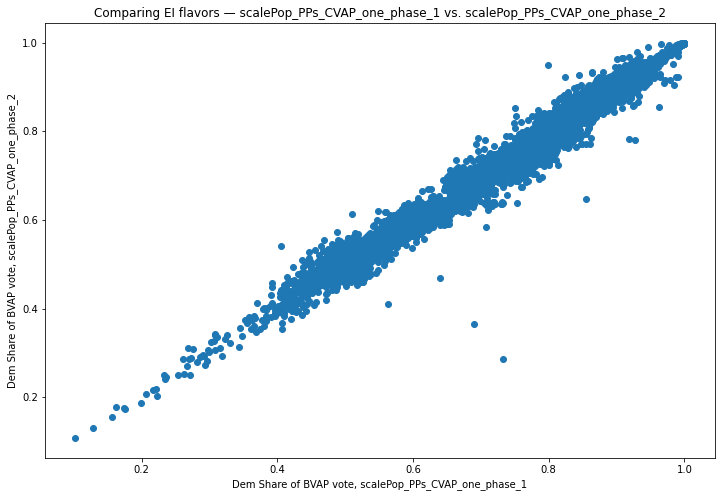

In [32]:
compare_runs("scalePop_PPs_CVAP_one_phase_1", "scalePop_PPs_CVAP_one_phase_2")

something weird is going on with `noPPs` in two-phase

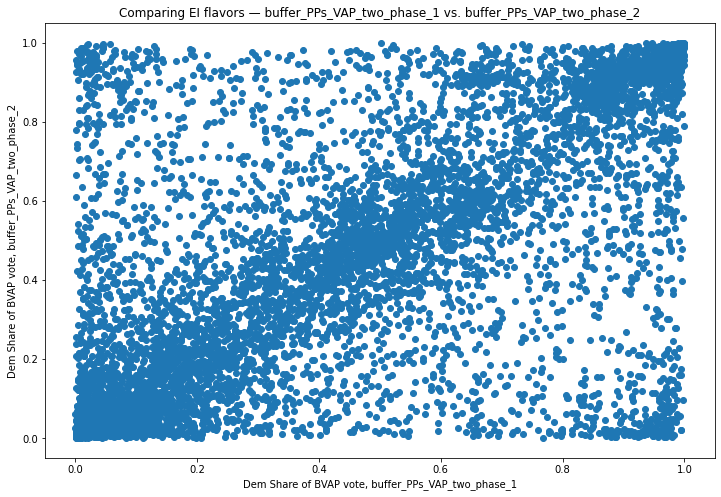

In [189]:
compare_runs("buffer_PPs_VAP_two_phase_1", "buffer_PPs_VAP_two_phase_2")

In [45]:
df1 = pd.read_csv("../final_testing/buffer_noPPs_VAP_two_phase_1.csv")
df2 = pd.read_csv("../final_testing/buffer_noPPs_VAP_two_phase_2.csv")

In [43]:
df1

,CNTY_x,CNTYVTD,TOTPOP,BPOP,HPOP,CVAP_2012,BCVAP_2012,HCVAP_2012,Obama,Romney,bvotes,hvotes,ovotes,BRvotes,HRvotes,ORvotes,BDvotes,HDvotes,ODvotes
0,1,10001,2341,368,217,1858,281,41,261,754,80.253003,53.301124,880.055309,19.670361,8.899702,745.065772,60.424104,44.234481,134.948952
1,1,10002,2732,188,135,2995,237,199,228,1179,43.583699,35.410383,1328.382184,42.478797,34.906264,938.014090,0.948339,0.394861,390.106488
2,1,10003,1345,92,96,1225,54,34,108,650,22.760832,25.510329,709.226283,19.818790,24.444078,566.670862,2.757550,0.919960,142.395214
3,1,10004,1684,52,47,1789,90,11,128,729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,10005,366,3,12,356,0,4,13,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,507,5070002,2124,7,2027,1792,0,1736,834,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8774,507,5070003,2060,7,1988,2102,1,1993,890,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8775,507,5070004,1256,4,1060,1240,1,980,413,166,2.004060,484.270038,92.812221,NaN,NaN,NaN,NaN,NaN,NaN
8776,507,507001A,1007,1,948,670,11,593,307,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df1.isna().sum()

CNTY_x           0
CNTYVTD          0
TOTPOP           0
BPOP             0
HPOP             0
CVAP_2012        0
BCVAP_2012       0
HCVAP_2012       0
Obama            0
Romney           0
bvotes        3304
hvotes        3304
ovotes        3304
BRvotes       5267
HRvotes       5267
ORvotes       5267
BDvotes       5267
HDvotes       5267
ODvotes       5267
dtype: int64

In [46]:
df2.isna().sum()

CNTY_x           0
CNTYVTD          0
TOTPOP           0
BPOP             0
HPOP             0
CVAP_2012        0
BCVAP_2012       0
HCVAP_2012       0
Obama            0
Romney           0
bvotes        3352
hvotes        3352
ovotes        3352
BRvotes       5368
HRvotes       5368
ORvotes       5368
BDvotes       5368
HDvotes       5368
ODvotes       5368
dtype: int64